### **Original Research Article** 
### [**John R. Koza, “Genetic Programming: On the Programming of Computers by Means of Natural Selection”, MIT Press, 1992, pages 162-169.**](https://doc.lagout.org/science/Artificial%20Intelligence/Evolutionary%20computation/Genetic%20programming%20Complex%20adaptive%20systems%20-%20Koza%20J.R..pdf)

---
![](https://cdn-images-1.medium.com/max/720/1*BYDJpa6M2rzWNSurvspf8Q.png)

## **Outline of Notebook**

* [**Genetic Algorithm**](#Genetic Algorithm)
* [**Search space**](#Search-space)
* [**Operators of Genetic Algorithms**](#Operators-of-Genetic-Algorithms)
* [**Psuedo Code of GA**](#Psuedo-Code-of-GA)
* [**Example** : **Buy &  Sell Apple Share price Analysis using GeneticOptimization**](#**Example**-:-**Buy-&--Sell-Apple-Share-price-Analysis-using GeneticOptimization**)
* [**GPlearn Example with Sklearn**](#GPlearn-Example-with-Sklearn)

# **Genetic Algorithm**

---
* Genetic Algorithms (GA) are adaptive heuristic search algorithms belonging to most evolutionary algorithms. Genetic algorithms are based on the notions of natural selection and genetics. It's an intelligent use of historical data-driven random search to guide the search for the best performing region in the solution's space.**They are commonly used to generate high quality solutions for optimization and search problems.**
* **Genetic algorithms simulate the process of natural selection**. This means that species that can adapt to changes in their environment will survive, reproduce, and move on to the next generation. In simple words, they simulate the "survival of the fittest" among individuals of successive generations to solve a problem. **Each generation consists of a population of individuals** and each individual represents a point in the search space and a possible solution. Each individual is represented as a string / whole / floating / bits. This chain is analogous to the chromosome.
* **Genetic algorithms** are based on an ***analogy to the genetic structure and behavior of the chromosome of the population.*** The following GA is based on this analogy:
    1. People in the population are fighting for resources and partners.
    1. Those who succeed (in better shape) make more offspring than others
    1. The genes of the "fittest" father spread over the entire generation, that is, sometimes they produce the offspring of the parents, which is better than the two parents.
    1. Thus, each subsequent generation adapts better to their environment.

### **Search space**

---

* The population of the persons is kept in the search space. Each person represents a solution in the search space for a given problem. Each individual is coded as a finite-length vector (analogous to the chromosome) of the components. These variable components are analogous to the genes. Thus, a chromosome (individual) consists of several genes (variable components).

![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/genetic-algorithm.png)

* A physical fitness score is given to each individual that shows the ability of an individual to "compete". The individual who has an optimal physical fitness score (or almost optimal) is sought.

* **GA maintain the population of n individuals (chromosome / solutions) along with their physical fitness scores.** People with better physical fitness scores are more likely to reproduce than others. Individuals with better physical fitness scores are matched and produce better offspring by combining the chromosomes of the parents. The size of the population is static, so the room must be created for newcomers. Therefore, some people die and are replaced by newcomers who eventually create a new generation when all the mating opportunities of the old population are exhausted. It is expected that successive generations arrive better solutions, while those that adapt less to death.

* Each new generation has on average more "better genes" than the individual (solution) of previous generations. Thus, each new generation has better "partial solutions" than previous generations. Once the offspring produced no significant difference with the offspring produced by previous populations, the population is convergent. It is said that the algorithm converges to a set of solutions for the problem.

### **Operators of Genetic Algorithms**

---

Once the initial generation is created, the algorithm evolve the generation using following operators –  
**1) Selection Operator:** The idea is to give preference to the individuals with good fitness scores and allow them to pass there genes to the successive generations.  
**2) Crossover Operator:** This represents mating between individuals. Two individuals are selected using selection operator and crossover sites are chosen randomly. Then the genes at these crossover sites are exchanged thus creating a completely new individual (offspring). For example –  
![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/genetic-algorithm1.png)  
**3) Mutation Operator:** The key idea is to insert random genes in offspring to maintain the diversity in population to avoid the premature convergence. For example –  
![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/genetic-algorithm2.png)  

### **Psuedo Code of GA**

---
The whole algorithm can be summarized as –

<pre>
1) Randomly initialize populations p
2) Determine fitness of population
3) Untill convergence repeat:
      a) Select parents from population
      b) Crossover and generate new population
      c) Perform mutation on new population
      d) Calculate fitness for new population
</pre>


## **Example** : **Buy &  Sell Apple Share price Analysis using GeneticOptimization**

---

In [1]:
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import numpy as np
import seaborn as sns

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import warnings
warnings.simplefilter("ignore")

In [2]:
# pull last 7 years of IBM stock data
r = requests.get('https://www.quandl.com/api/v3/datasets/EOD/AAPL.json?api_key=9xqjN15_V3Mm13QKpFDg&start_date=2012-11-01&end_date=2018-12-31')
column_names = r.json()['dataset']['column_names']
# get data and turn it into a numpy array
data = r.json()['dataset']['data']
data = [row[4] for row in data]
data = np.array(data)
print('APPLE closing price for past 7 years:')
print(data)
print('{} sessions'.format(data.size))

APPLE closing price for past 7 years:
[157.74   156.23   156.15   ... 584.6211 576.8    596.5399]
1551 sessions


Text(0.5,1,'7 Year Stock Price of APPLE')

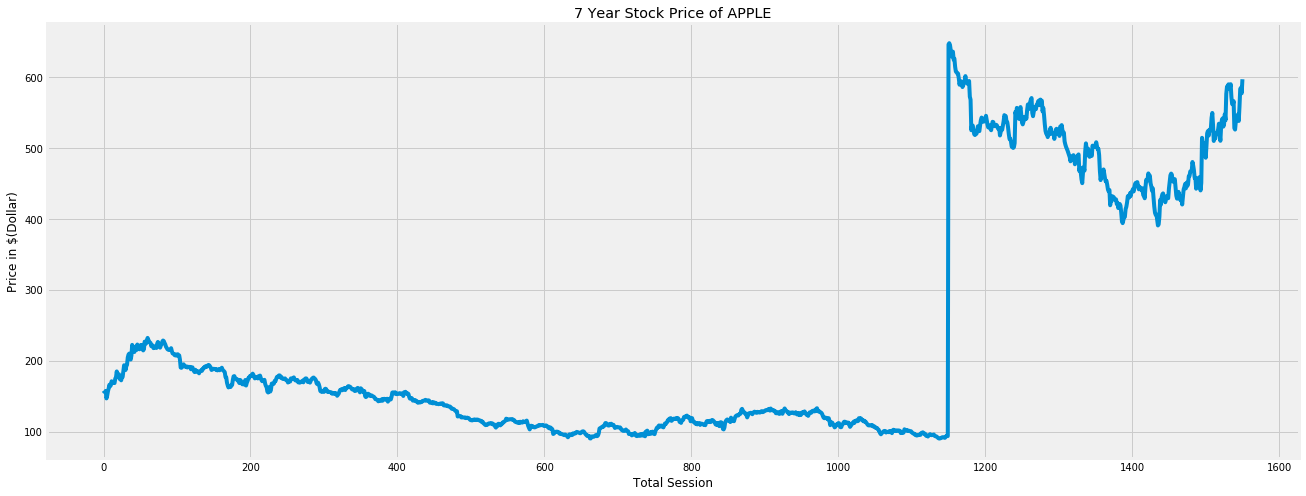

In [3]:
plt.figure(figsize=(20,8))
plt.plot(data)
plt.xlabel("Total Session")
plt.ylabel("Price in $(Dollar)")
plt.title("7 Year Stock Price of APPLE")

In [4]:
# create genetic models

# -1 will be sell points, 0 will be hold points, 1 will by buy points. algo will evolve to generate the most
# profitable buy and sell points in a stock. fitness will be evaluated on a first in, first out manner.

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=data.size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [5]:
# generate an example individual

ind1 = toolbox.individual()

In [6]:
ind11 = pd.DataFrame(ind1, columns=['Counts'])

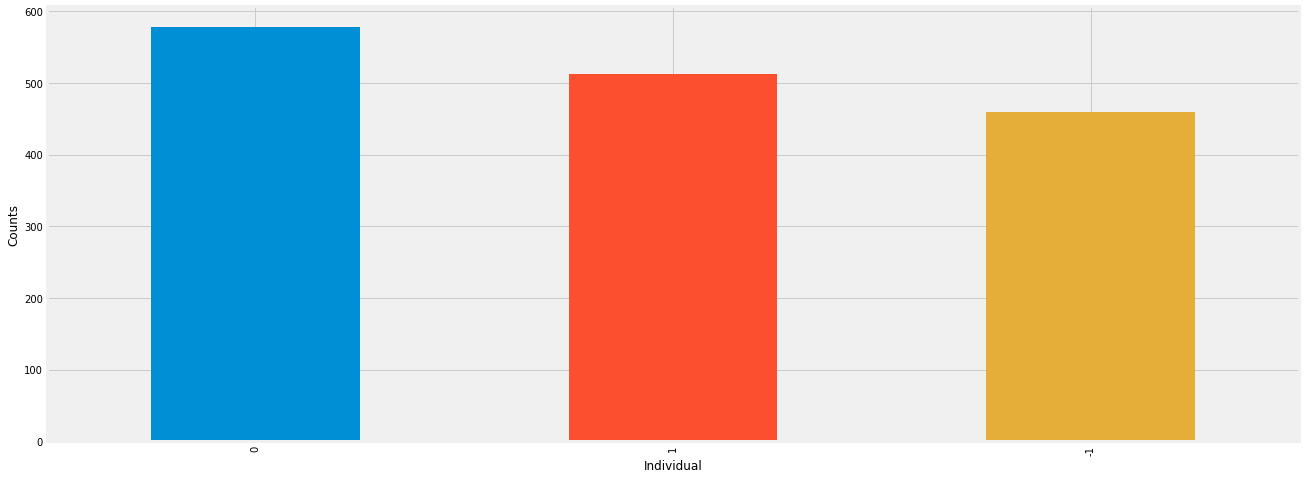

In [7]:
def count_plot(ind11):
    plt.figure(figsize=(20,8))
    ind11['Counts'].value_counts().plot(kind="bar")
    plt.xlabel("Individual")
    plt.ylabel("Counts")
# plt.title("7 Year Stock Price of APPLE")
count_plot(ind11)

In [8]:
# create seperate lists to know where to mark each buy and sell point on the data
buy_markers = [i for i, x in enumerate(ind1) if x == 1]
sell_markers = [i for i, x in enumerate(ind1) if x == -1]
# buy_markers = pd.DataFrame(buy_markers, columns=['Counts'])
# sell_markers = pd.DataFrame(sell_markers, columns=['Counts'])

Text(0.5,1,'7 Year Stock Price of APPLE')

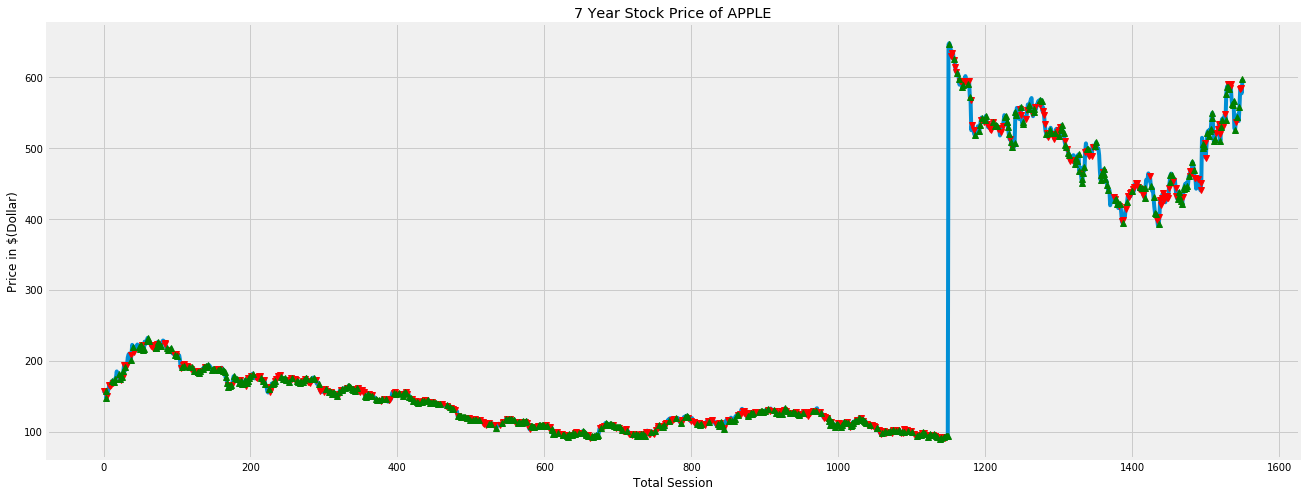

In [9]:
# what a generation 0 random individual looks like currently
plt.figure(figsize=(20,8))
plt.plot(data)
plt.plot(data, color='r', marker='v', markevery=sell_markers, linewidth=0)
plt.plot(data, color='g', marker='^', markevery=buy_markers, linewidth=0)
plt.xlabel("Total Session")
plt.ylabel("Price in $(Dollar)")
plt.title("7 Year Stock Price of APPLE")

In [10]:
# the evaluation function will only calculate long trades
# short trades will 'sell' stock if they are available
# the trade at index 0 will always be sold on a short trade

commission_cost = 2.99

def evalFitness(individual):
    trades = []
    profit = 0
    for i in range(data.size):
        if individual[i] == 1:
            trades.append(data[i])
            profit -= commission_cost
        if individual[i] == -1:
            if len(trades) > 0:
                profit += (data[i] - trades[0]) - commission_cost
    return (profit,)

In [11]:
# testing our randomly generated individual.
# it's going to be a crappy individual to start off
print (evalFitness(ind1))

(30517.887999999977,)


In [12]:
# set up genetic operators for evolution of the population
toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

In [13]:
# evolve!
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=400, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max    
0  	300   	35392.8	3860.68	20851.3	47681.4
1  	187   	38338.5	3014.04	30401.3	49804.9
2  	186   	40534.5	3323.76	31073.6	49804.9
3  	163   	42699.6	3039.77	34211.6	50485.4
4  	165   	44616.5	2645.23	33570.9	51094  
5  	177   	46234  	2283.75	33449.6	51094  
6  	190   	47431.9	2033.98	34807.1	53249.7
7  	183   	48462.9	1850.64	40356  	53484.5
8  	179   	49432.5	1559.29	44428.8	54957.9
9  	175   	50057.9	1623.46	42615.9	55016.3
10 	188   	50709.4	1733.47	43037.6	55036.8
11 	168   	51569.8	1697.87	45427.1	55890.9
12 	174   	52340.6	2031.43	38141.6	56256.1
13 	194   	53234.3	1999.64	37854.2	56256.1
14 	181   	54059.8	1794.01	40393.1	56755.9
15 	179   	54674.2	1541.28	47033.2	56897  
16 	181   	55181.2	1304.9 	49089.3	57073.8
17 	181   	55453.2	1298.54	50390.4	57318  
18 	183   	55636  	1452.08	48842.9	57318  
19 	166   	56014.4	1333   	50334.6	57801  
20 	199   	56049.4	1558.27	48735.2	57851.2
21 	178   	56466.8	1348.54	50130.9	58272.4
22 	182   	

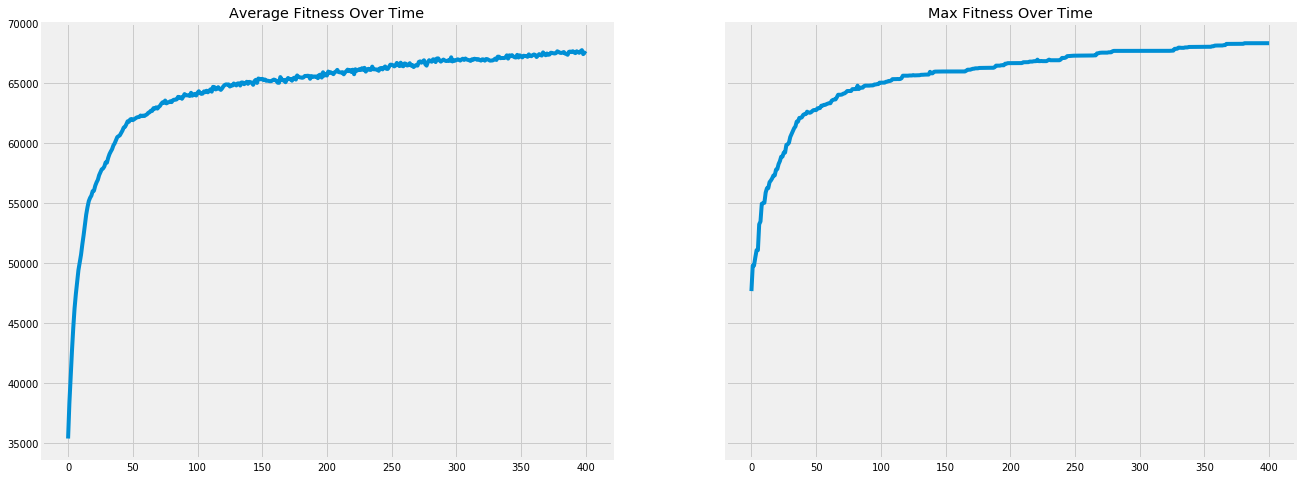

In [14]:
# plot results
avg = log.select('gen', 'avg')
max = log.select('gen', 'max')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.set_title('Average Fitness Over Time')
ax1.plot(avg[0], avg[1])
ax2.set_title('Max Fitness Over Time')
ax2.plot(max[0], max[1])

Text(0.5,1,'7 Year Stock Price of APPLE')

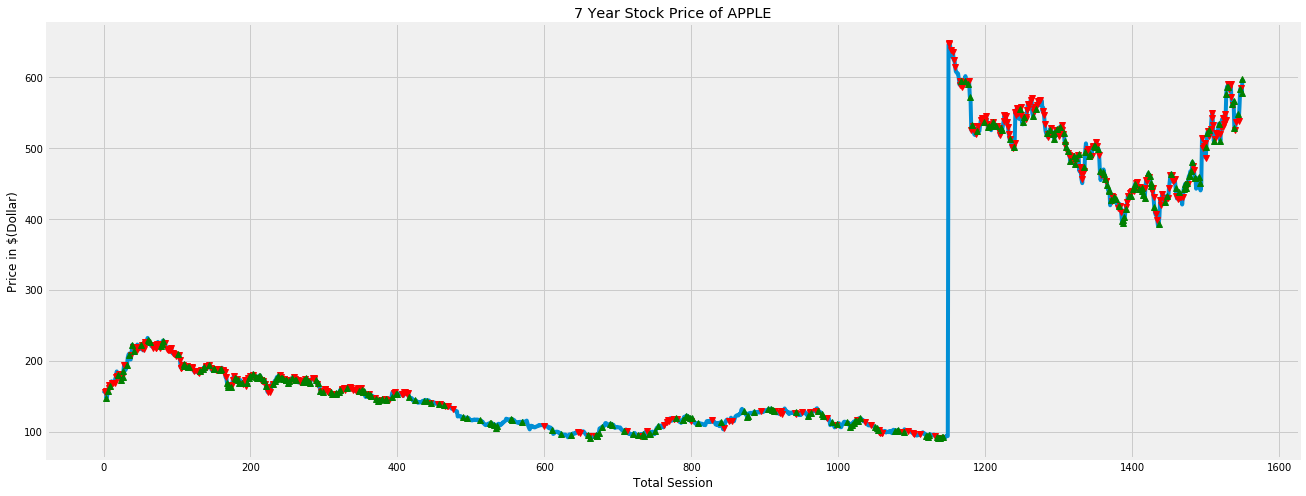

In [15]:
# plot the best organism and see how it did compared to the randomly generated one

best_ind = tools.selBest(pop, 1)[0]

buy_markers = [i for i, x in enumerate(best_ind) if x == 1]
sell_markers = [i for i, x in enumerate(best_ind) if x == -1]

plt.figure(figsize=(20,8))
plt.plot(data)
plt.plot(data, color='r', marker='v', markevery=sell_markers, linewidth=0)
plt.plot(data, color='g', marker='^', markevery=buy_markers, linewidth=0)
plt.xlabel("Total Session")
plt.ylabel("Price in $(Dollar)")
plt.title("7 Year Stock Price of APPLE")

# **GPlearn Example with Sklearn**
---

In [16]:
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state
import numpy as np

In [17]:
random_engine = check_random_state(0)
X_train = random_engine.uniform(-1, 1, 10000).reshape(-1, 1)
Y_train = np.sinh(X_train)
X_test = random_engine.uniform(-1, 1, 10000).reshape(-1, 1)
Y_test = np.sinh(X_test)

In [18]:
est_gp = SymbolicRegressor(population_size=5000, generations=50,
                               stopping_criteria=0.01, p_crossover=0.6,
                               p_subtree_mutation=0.1,
                               p_hoist_mutation=0.1, p_point_mutation=0.1,
                               max_samples=0.9, verbose=1,
                               parsimony_coefficient=0.01, n_jobs=1,
                               function_set=('add', 'mul', 'max'))

In [19]:
est_gp.fit(X_train, Y_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.36 1.1274955510034967        7 0.021935441871069866 0.022129497837441156     12.55m
   1    10.27 0.38579287181012056        7 0.02180775094787259 0.0232787161462166     11.53m
   2     5.16 0.18083136732600028       15 0.019776549665057052 0.018632483789298354      9.77m
   3     1.67 0.09833988064400707        1 0.04289003924478886 0.04894172027630904      7.96m
   4     1.57 0.09211059116900344        7 0.022931205525369223 0.02352726057509154      6.83m
   5     1.73 0.1022590374511037        1 0.042902482556222414 0.048829730473406996      6.07m
   6     1.67 0.10015832545067471        7 0.02441155105888648 0.024698965824152645      5.51m
   7     1.62 0.09880464983662839        1 0.04280892677683494 0.049671732487894374      5.0

SymbolicRegressor(const_range=(-1.0, 1.0), function_set=('add', 'mul', 'max'),
         generations=50, init_depth=(2, 6), init_method='half and half',
         max_samples=0.9, metric='mean absolute error', n_jobs=1,
         p_crossover=0.6, p_hoist_mutation=0.1, p_point_mutation=0.1,
         p_point_replace=0.05, p_subtree_mutation=0.1,
         parsimony_coefficient=0.01, population_size=5000,
         random_state=None, stopping_criteria=0.01, tournament_size=20,
         verbose=1, warm_start=False)

In [20]:
score_train = est_gp.score(X_train, Y_train)
score_test = est_gp.score(X_test, Y_test)
predicted = est_gp.predict(X_test)
print(score_train, score_test)

0.989377616859078 0.9892901173704259


No handles with labels found to put in legend.


Text(0.5,1,'Prediction vs Actual Result Analysis')

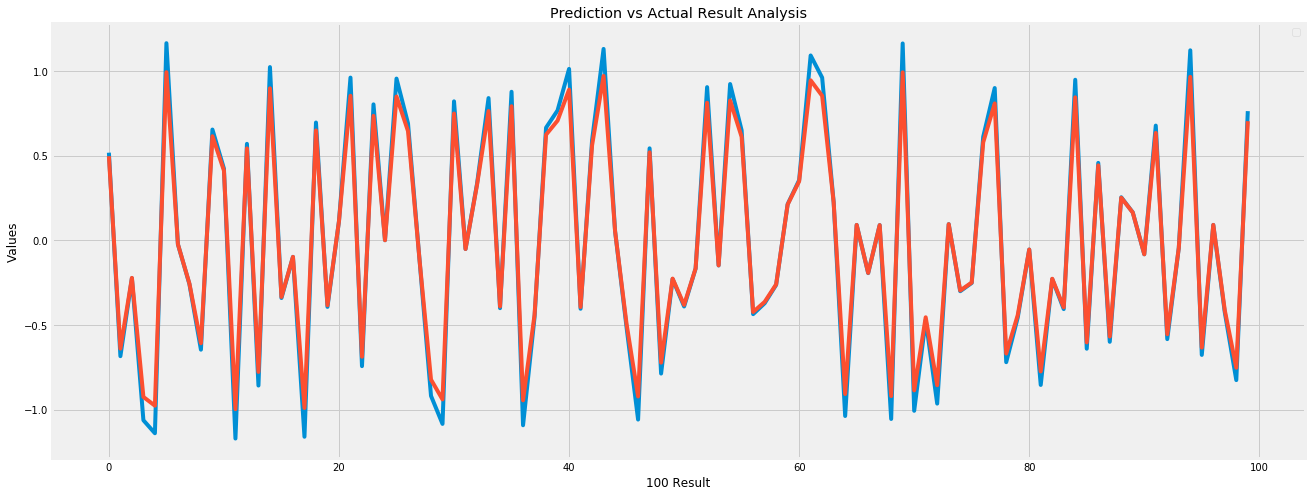

In [21]:
plt.figure(figsize=(20,8))
plt.plot(Y_test[:100])
plt.plot(predicted[:100])
plt.xlabel("100 Result")
plt.ylabel("Values")
plt.legend()
plt.title("Prediction vs Actual Result Analysis")

## **References :**
1. https://codereview.stackexchange.com/questions/194947/genetic-algorithm-for-traveling-salesman
2. https://www.researchgate.net/post/Using_genetic_algorithm_for_time_series_prediction_and_preprocessing_the_data
3. LinkedIn: https://www.linkedin.com/pulse/introduction-optimization-genetic-algorithm-ahmed-gad/
4. KDnuggets: https://www.kdnuggets.com/2018/03/introduction-optimization-with-genetic-algorithm.html
5. TowardsDataScience: https://towardsdatascience.com/introduction-to-optimization-with-genetic-algorithm-2f5001d9964b
6. SlideShare: https://www.slideshare.net/AhmedGadFCIT/introduction-to-optimization-with-genetic-algorithm-ga